<h2 style = "font-family: Times New Roman; font-size: 28px; font-style: normal; letter-spcaing: 3px; background-color:#36609A ; color :#FFCE30 ; border-radius: 5px 5px; padding:10px;text-align:center; font-weight: bold" >Application of Machine Learning for Risky Sexual Behavior Interventions among Factory Workers in China<br/></h2 > 
<h2 style = "font-family: Times New Roman; font-size: 16px; font-style: normal; letter-spcaing: 3px; background-color:#36609A; color : #FFCE30 ; border-radius: 5px 5px; padding:3px;text-align:center; font-weight: bold" >Shiben ZHU<br/>Oct 29,2022<br/>Email：shiben@link.cuhk.edu.hk</h2> 
</div>

<a id = '1.0'></a>
<h2 style = "font-family: garamond; font-size: 24px; font-style: normal; letter-spcaing: 3px; background-color:#80ff00 ; color : #36609A; border-radius: 5px 5px; padding:3px;text-align:left; font-weight: bold" >1.Imoprt different modules</h2> 

In [106]:
import os,warnings
import pandas as pd,numpy as np,matplotlib.pyplot as plt,seaborn as sns
from datetime import datetime
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')

<a id = '1.0'></a>
<h2 style = "font-family: garamond; font-size: 24px; font-style: normal; letter-spcaing: 3px; background-color:#80ff00 ; color : #36609A; border-radius: 5px 5px; padding:3px;text-align:left; font-weight: bold" >2.Dataset Preprocession</h2> 

In [117]:
#load dataset
dataset=pd.read_excel('Final dataset clean for analysis_Oct23.xlsx',index_col='ID').fillna(0).replace(-9,3)

date_format='%Y-%m-%d'
deadline=datetime.strptime('2019-11-01',date_format) 
dataset['Age']=dataset['a1'].apply(lambda x:int((deadline-datetime.strptime(str(x).split(' ')[0],date_format)).days/365) if int(str(x).split(' ')[0][-2:])<19 else int((deadline-datetime.strptime(str(x).split(' ')[0],date_format)).days/365))
dataset['Years from the first time leaving hometown'],dataset['Years in Shenzhen']=dataset['a121']+dataset['a122']/60,dataset['a131']+dataset['a132']/60
dataset['Work time per week(h)'],dataset['Overtime per week(h)']=dataset['b1'],dataset['b2']
dataset['White wine'],dataset['Yellow wine'],dataset['Red wine'],dataset['Beer']=dataset['b7b1']*dataset['b7b2'],dataset['b7c1']*dataset['b7c2'],dataset['b7d1']*0.12,(dataset['b7e1']+dataset['b7e2'])/2
dataset['Heavy exercise time(h)'],dataset['Light exercise time(h)'],dataset['Walk time(h)'],dataset['Meditation time(h)']=dataset['b81']*(dataset['b82']+dataset['b83']/60),dataset['b84']*(dataset['b85']+dataset['b86']/60),dataset['b87']*(dataset['b88']+dataset['b89']/60),7*(dataset['b810']+dataset['b811']/60)
dataset['Current available information to determine whether infected with HIV'],dataset['Needed information to determine whether infected with HIV']=dataset['b21'],dataset['b22']

#define dependent variables
dataset['Condomless Sexual Behaviour']=dataset.apply(lambda x:1 if x[['c21b','c22b','c23b','c41b','c42b','c43b','c61b','c62b','c63b']].isin([2]).any().any() else 0,axis=1)
df=dataset.drop(columns=['c21b','c22b','c23b','c41b','c42b','c43b','c61b','c62b','c63b',#here we don't drop them because of heatmap
                         'a1','a41','a5e_detail', 'a10a_detail','a14b','a152','c9b2','c9h2','l01','l02','l03','l04','filter_$',
                         'a121','a122','a131','a132',
                         'b1','b2',
                         'b7b1','b7b2','b7c1','b7c2','b7d1','b7e1','b7e2',
                         'b81','b82','b83','b84','b85','b86','b87','b88','b89','b810','b811',
                         'b21','b22'])


# 1 dependet variable are:depv
# 253 categorical variables
# 15 continuous variables are:Age,Years from the First Time I Left My Hometown,Years in Shenzhen,Work Time Per Week(h),Overtime Per Week(h),White Wine,Yellow Wine,Red Wine,Beer,Heavy Exercise Time(h),Light Exercise Time(h),Walk Time(h),Meditation time(h),Current Available Information to Determine if Infected with HIV,Needed Information to Determine if Infected with HIV
class color:
    BOLD = '\033[1m'
    BOLD_COLOR = '\033[1m' + '\033[93m'
    END = '\033[0m'
colors = ['#EF7D71','#41ABD7','#36609A','#FFCE30','#194350']

print('\n'+color.BOLD_COLOR +'transform some unclear variables to clear variables'+color.END + '\n')
print('\n'+color.BOLD_COLOR +'original dataset(after filling na values and transforming,only show first 5 lines):'+color.END + '\n')
display(df)
#display(df.groupby(['Condomless Sexual Behaviour']).describe(include='all').T.to_excel('Ages.xlsx'))



transform some unclear variables to clear variables


original dataset(after filling na values and transforming,only show first 5 lines):



,类型,来源,a2,a3,a4,a42,a5,a6,a7a,a7b,...,Yellow wine,Red wine,Beer,Heavy exercise time(h),Light exercise time(h),Walk time(h),Meditation time(h),Current available information to determine whether infected with HIV,Needed information to determine whether infected with HIV,Condomless Sexual Behaviour
ID,,,,,,,,,,,,,,,,,,,,,
Q01,电子器材,工厂-深越光电,2,1,3,3.0,5,0,0,0,...,0.0,0.00,0.0,9.000000,0.000000,2.500000,0.000000,0.0,0.0,0
Q02,电子器材,工厂-深越光电,1,1,3,3.0,1,0,0,0,...,0.0,0.00,0.5,0.500000,0.000000,0.666667,21.000000,90.0,80.0,0
Q03,电子器材,工厂-深越光电,2,1,3,3.0,3,1,0,0,...,0.0,0.00,0.0,0.000000,56.000000,7.000000,14.000000,0.0,0.0,1
Q04,电子器材,工厂-深越光电,1,1,3,3.0,1,0,0,0,...,0.0,0.00,1.5,1.500000,0.000000,6.666667,12.833333,0.0,0.0,0
Q05,电子器材,工厂-深越光电,1,1,3,3.0,3,1,0,0,...,0.0,0.00,0.0,0.000000,0.000000,14.000000,77.000000,80.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
x94,冶炼,工厂-深日钢材,1,1,3,3.0,3,3,0,0,...,38.0,0.12,1.0,0.000000,0.000000,2.000000,42.000000,100.0,100.0,0
x95,冶炼,工厂-深日钢材,1,1,1,0.0,2,0,1,0,...,0.0,0.00,3.5,0.833333,0.833333,40.000000,14.000000,50.0,50.0,0
x96,冶炼,工厂-深日钢材,2,1,2,2.0,3,2,0,1,...,0.0,0.00,0.0,0.666667,0.666667,2.000000,0.000000,60.0,60.0,0


In [108]:
#Dataset Visualization
#for continous variables
#Table1 Description
cont_dir='continuous variables'
if not os.path.exists(cont_dir):
    os.mkdir(cont_dir) 
print('\n'+color.BOLD_COLOR +'continous variables description:'+color.END + '\n')
#display(df.iloc[:,-16:-1].describe(include='all'))
df.iloc[:,-16:-1].describe(include='all').to_excel('./continuous variables/continuous.xlsx')
#density plot
#because it will show many figures,we to note it for no-run, you can delete it for images
'''
for cont in df.iloc[:,-16:-1].columns.tolist():
    sns.set()
    plt.rcParams["font.family"] = "SimHei"
    fig,axes =plt.subplots(figsize=(8, 4))
    sns.kdeplot(df[cont],x=None,shade=True,linewidth=1.5)
    
    plt.savefig('./continuous variables/{}.jpg'.format(cont))
    plt.close()
'''
    
#for categorical variables
categ_dir='categorical variables'
if not os.path.exists(categ_dir):
        os.mkdir(categ_dir) 
categordata=pd.concat([df.iloc[:,:-16],df.iloc[:,-1]],axis=1)
crosst=pd.DataFrame()
for categ in df.iloc[:,:-16].columns.tolist():
    crosst=pd.concat([crosst,pd.crosstab(df[categ],df['Condomless Sexual Behaviour']).assign(catergorical=lambda x:categ)],axis=0)
    #because it will show many figures,we to note it for no-run, you can delete it for images
    '''
    sns.set()
    fig, ax = plt.subplots(figsize=(10, 6))
    plt.rcParams['font.sans-serif'] = ['SimHei']
    sns.countplot(x = categ,data = categordata,hue = "Condomless Sexual Behaviour",palette="Set1")
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, ["Yes", "No"], title='Condomless Sexual Behaviour', fontsize=16, title_fontsize=20)
    if categ=='类型' or categ=='来源':fig.autofmt_xdate()
    sns.despine(right = True)
    plt.savefig('./categorical variables/{}.jpg'.format(categ))
    plt.close
'''
print('\n'+color.BOLD_COLOR +'categorical variables description:'+color.END + '\n')
#display(crosst)
crosst.to_excel('./categorical variables/catergorical.xlsx')


continous variables description:


categorical variables description:



In [109]:
# encode categorical variables
list_not_digit=df.columns[:-16]
for c in list_not_digit:
    encoder=preprocessing.LabelEncoder()
    encoder.fit(np.unique(df[c].astype(str)))
    df[c]=encoder.transform(df[c].astype(str))
print('\n'+color.BOLD_COLOR +'Encode data:'+color.END + '\n')
display(df.head())

# Normalization
df= pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(df.values),index=df.index,columns=df.columns)
print('\n'+color.BOLD_COLOR +'Normalization data description:'+color.END + '\n')
#display(df.head())

#Correlation Matrix Heatmap
#sns.set()
#plt.rcParams["font.family"] = "SimHei"
#because it will generate a very big figure,we to note it for no-run, you can delete it for show
'''
f,ax=plt.subplots(figsize=(500,500))
'''
corr=df.corr()
#because it will generate a very big figure,we to note it for no-run, you can delete it for show
'''
hm=sns.heatmap(round(corr,2),annot=True,ax=ax,cmap='coolwarm',fmt='.2f',linewidths=1.5)
f.subplots_adjust(top=0.93)
t=f.suptitle('Condomless Sexual Behaviour Different Factors Correlation Heatmap',fontsize=40)
heat_dir='heatmap'
if not os.path.exists(heat_dir):
    os.mkdir(heat_dir) 
plt.savefig('./heatmap/heatmap.jpg')
plt.close
#corr.to_excel('./heatmap/correlationship.xlsx')
'''
df.rename(columns={'a6':'Number of children',
                   'a5':'Marital status',
                   'a17':'Have participated in HIV prevention activities or knowledge',
                   'a7b':'Living with wife or husband in shenzhen',
                   'a11':'Percent of monthly income needs to be sent back home',
                   'b38':'Not clear about your duty',
                   'b43':'Sadness at leaving home',
                   'b61':'Emotional support your family can give',
                   'b62':'Emotional support your friends/colleagues can give',
                   'b63':'Instrumental support your family can give',
                   'b64':'Instrumental support your friends/colleagues can give',
                   'b311':'Work with previously acquired knowledge and skills',
                   'b313':'Regularly apply previously acquired knowledge and skills',
                   'c21a':'Number of wife and regular girlfriends',
                   'c61a':'Number of husbands or regular boyfriends',
                   'c51a':'Female had vaginal or anal intercourse with a man',
                   'c1':'Had sex with a woman',
                   'c11c':'Make sure you have a condom handy when you plan to have sex',
                   'c8a':'Termination of pregnancy by abortion due to unplanned pregnancy',
                   'c42a':'Number of non-regular male sex partners',
                   'c7b':'Number of unplanned pregnancy',
                   'c11d':'Communicating for condoms',
                   'c14b':'The idea of using condoms does not appeal to you',
                   'e57':'Others are very concerned about me',
                   'a10d':'Paying medical bills',
                   'e3b':'A strong desire to escape from life',
                   'b75':'Drinking and forgetting what happened the last night',
                   'c22a':'Number of non-regular female sex partners',
                   'c23a':'Number of commercial female sex partners',
                   'b107':'Lose interest in other past hobbies beacuse of online games',
                   'a10b':'Need to build a house',
                   'd8b':'Easy to self-test for HIV',
                   'e2g':'Feeling scared, like something terrible is about to happen',
                   'b58':'Will talk to make unpleasant feelings go away',
                   'c9g':'Friend referrals for non-regular or commercial sex partners',
                   'c11a':'Proper condom use during sex',
                   'e3h':'Wanting to leave people who are better than me',
                   'd5a':'Chance of contracting HIV in the next six months',
                   'd2':'Have done an HIV self-test',
                   'b13':'Have searched for online information about HIV within the last year',
                   'e6b':'Had planned to commit suicide',
                   'c15f':'Had passively seen pornographic content',
                   'a10c':'Paying school fees for children or siblings',
                   'b15':'Overall satisfaction with the online HIV consultation',
                   'a10a':'Had debts or loans',
                   'c15c':'Someone you know had asked you to have sex by the internet and mobile apps',
                   'b48':'Happy with daily life in shenzhen',
                   'b312':'Regular opportunities to do what you are good at',
                   'b41':'Often feel grateful to be working in shenzhen',
                   'c14c':'Condoms make sex less fun',
                   'b7a':'Frequency of drinking',
                   'c14f':'Dislike to use condoms',
                   'c13a':'Want to start using a condom',
                   'c7a':'Had unplanned pregnancy',
                   'b46':'missing hometown',
                   'e513':'Feel that someone can help me when need',
                   'e510':'Fortunate to have many friends who care about me and support me',
                   '类型':'Factory type',
                   'b1011':'Lose opportunities beacuse of online games',
                   'b37':'Often asked to do things that conflict with my job',
                   'b35':'Often feel a substantial increase in workload',
                   'b33':'Often have to complete work at short notice',
                   'c9f':'Bars/Nightclubs for non-regular or commercial sex partners',
                   'c43a':'Number of commercial male sex partners among MSM',
                   'c41a':'Number of husbands or regular boyfriends among MSM',
                   'd8n':'Perceived behavioral control to take up HIV self-testing',
                   'e515':'Have at least one satisfied interaction daily',
                   'e7':'Take any prohibited drugs in the last six months',
                   'e3p':'Feeling in an inescapable deep hole',
                   'e415':'Thinking I\'ve lost an important battle in my life',
                   'b71':'Once you start drinking you can\'t stop',
                   'b123':'Know how to find useful health information or resources online',
                   'b127':'Can distinguish between high and low quality health information online',
                   'e2c':'Over-worried about different things',
                   'e3a':'I am in a state of distress',
                   'b109':'Hiding my enthusiasm for online games from others',
                   'e6e':'Planned suicide in the past year',
                   'e3o':'Want to start afresh away from self',
                   'c12b':'Don\'t want to have sex with the opposite sex you\'ve been seeing for a while yet',
                   'e3e':'Feeling powerless to change things',
                   'a7c':'Living with children in shenzhen',
                   'e6c':'Have you ever committed or nearly committed suicide',
                   'd4':'The last time you had an HIV self-test was with counselling services',
                   'e8':'Have taken these prohibited drugs before or during sex in the past six months',
                   'e2e':'Restlessness leading to fidgeting',
                   'c16b':'Industrial workers think it\'s okay to have more than one regular partner',
                   'e48':'Feeling a lack of confidence',
                   'e49':'Feeling that I can cope with whatever difficulties I face',
                   '来源':'Source',
                   'e47':'Feeling powerless',
                   'e3j':'Think I\'m trapped by others',
                   'e58':'Feelings of belonging',
                   'e3c':'In a relationship you can\'t get out of',
                   'b56':'Take the time to do something to reduce the number of times you think about it',
                   'c3':'MSM',
                   'b310':'Job performance criteria are often clearly defined',
                   'b45':'Feeling lonely because family and friends are not around',
                   'e1f':'Feeling scared',
                   'c11b':'Buy/obtain condoms yourself',
                   'b32':'You are often asked to work very hard',
                   'e412':'Feeling like a loser',
                   'c13b':'Important to use a condom when having sex with strangers',
                   'e1d':'Feeling that everything I do is a lot of work',
                   'b1010':'Playing online games as a way to escape or relieve negative emotions',
                   'b106':'Tried unsuccessfully to limit the extent to which I could play online games',
                   'e45':'Feeling that there is no place for me in this world',
                   'e6a':'Have considered suicide',
                   'b14':'Number of HIV or STI-related online consultations using mobile phone software in the last year',
                   'd31':'Self-testing reagents for HIV obtained elsewhere',
                   'c9e':'Gatherings for non-regular or commercial sex partners'},inplace=True)
# shuffle and split training and test sets
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df.iloc[:,-1], test_size=0.2,shuffle=True)


Encode data:



,类型,来源,a2,a3,a4,a42,a5,a6,a7a,a7b,...,Yellow wine,Red wine,Beer,Heavy exercise time(h),Light exercise time(h),Walk time(h),Meditation time(h),Current available information to determine whether infected with HIV,Needed information to determine whether infected with HIV,Condomless Sexual Behaviour
ID,,,,,,,,,,,,,,,,,,,,,
Q01,7,8,1,0,2,3,4,0,0,0,...,0.0,0.0,0.0,9.0,0.0,2.500000,0.000000,0.0,0.0,0
Q02,7,8,0,0,2,3,0,0,0,0,...,0.0,0.0,0.5,0.5,0.0,0.666667,21.000000,90.0,80.0,0
Q03,7,8,1,0,2,3,2,1,0,0,...,0.0,0.0,0.0,0.0,56.0,7.000000,14.000000,0.0,0.0,1
Q04,7,8,0,0,2,3,0,0,0,0,...,0.0,0.0,1.5,1.5,0.0,6.666667,12.833333,0.0,0.0,0
Q05,7,8,0,0,2,3,2,1,0,0,...,0.0,0.0,0.0,0.0,0.0,14.000000,77.000000,80.0,0.0,1



Normalization data description:



<a id = '2.0'></a>
<h2 style = "font-family: garamond; font-size: 24px; font-style: normal; letter-spcaing: 3px; background-color:#80ff00 ; color : #36609A; border-radius: 5px 5px; padding:3px;text-align:left; font-weight: bold" >3.Train different models and evluation</h2> 

In [110]:
#models:Logistic,SVM,RF,XGBboost,KNN,NB,NN
#import different modules
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import roc_curve,roc_auc_score,f1_score,accuracy_score,precision_score,recall_score,confusion_matrix
import shap
heat_dir='Evaluation'
if not os.path.exists(heat_dir):
    os.mkdir(heat_dir) 
    
#Train models to extract top features in the best mnodels
def features(n,p,x,y,xx,yy):
    clf=[LogisticRegression(),SGDClassifier(loss='modified_huber',alpha=0.000001,penalty = 'l2',class_weight={0: 0.7, 1: 0.3}),
        RandomForestClassifier(),XGBClassifier(),KNeighborsClassifier(n_neighbors=2),BernoulliNB(),MLPClassifier(random_state=1, max_iter=300)]
    names=['LR','SVM','RF','XGBoost','KNN','NB','NN']
    resluts=pd.DataFrame()
    rank=pd.DataFrame()
    f,ax=plt.subplots(figsize=(20,20))
    for (name,model) in zip(names,clf):
        model.fit(x, y)
        lr_probs=(model.predict_proba(xx))[:, 1]
        yhat=model.predict(xx)
        lr_fpr, lr_tpr, _ =roc_curve(yy, lr_probs)
        tn, fp, fn, tp = confusion_matrix(yy, yhat).ravel()
        accuracy=accuracy_score(yy, yhat)# accuracy: (tp + tn) / (p + n)
        precision=precision_score(yy, yhat)# precision: tp / (tp + fp)
        sensitivity=recall_score(yy, yhat)# recall: tp / (tp + fn)
        specificity=tn/(tn+fp)
        f1=f1_score(yy, yhat)# f1: 2 tp / (2 tp + fp + fn)
        roc=roc_auc_score(yy, lr_probs)
        resluts=pd.concat([resluts,pd.DataFrame({'Name':name,'Accuracy':[accuracy],'Precision':[precision],'Sensitivity':[sensitivity],'Specificity':[specificity],'F1':[f1],'ROC':[roc]})],axis=0)
        
        if name=='RF':
            rf_importances = pd.DataFrame(data={'Attribute': x.columns,'Importance': model.feature_importances_})
            rf_importances = rf_importances.sort_values(by='Importance', ascending=False)
        if name=='LR':
            lr_importances = pd.DataFrame(data={'Attribute': x.columns,'Importance': model.coef_[0]})
            lr_importances = lr_importances.sort_values(by='Importance', ascending=False)
        plt.plot(lr_fpr, lr_tpr,lw=6,marker='.', label=name)
        plt.plot([0, 1], [0, 1],color='navy', lw=3, linestyle='--')
        plt.xlim([0.0, 1])
        plt.ylim([0.0, 1])
        plt.xlabel("False Positive Rate", fontsize=34)
        plt.ylabel("True Positive Rate", fontsize=34)
        plt.legend(fontsize=34,frameon=True)
        plt.title('Different Models ROC Curve', fontsize=34)

    # show the plot
    plt.savefig('./Evaluation/'+str(n)+'ROC_standard'+str(p)+'.jpg')
    plt.show()
    plt.close
    #save the result
    rf_importances.to_excel('./Evaluation/'+str(n)+'rf_importance_rank'+str(p)+'.xlsx',index=False)
    lr_importances.to_excel('./Evaluation/'+str(n)+'lr_importance_rank'+str(p)+'.xlsx',index=False)
    resluts.to_excel('./Evaluation/'+str(n)+'evaluation_criteria'+str(p)+'.xlsx',index=False)
    display(resluts)
    return rf_importances.iloc[:p,:],lr_importances.iloc[:p,:]

def feature_plot(values,names,stand,st):
    plt.figure(figsize=(10,8))
    sns.barplot(x=values, y=names)
    plt.title('Top'+str(stand)+' Factors in The '+st+' Model')
    plt.xlabel('Factor Importance')
    plt.ylabel('Factor Names')
    plt.show()
    plt.close
    return None

[23:55:56] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


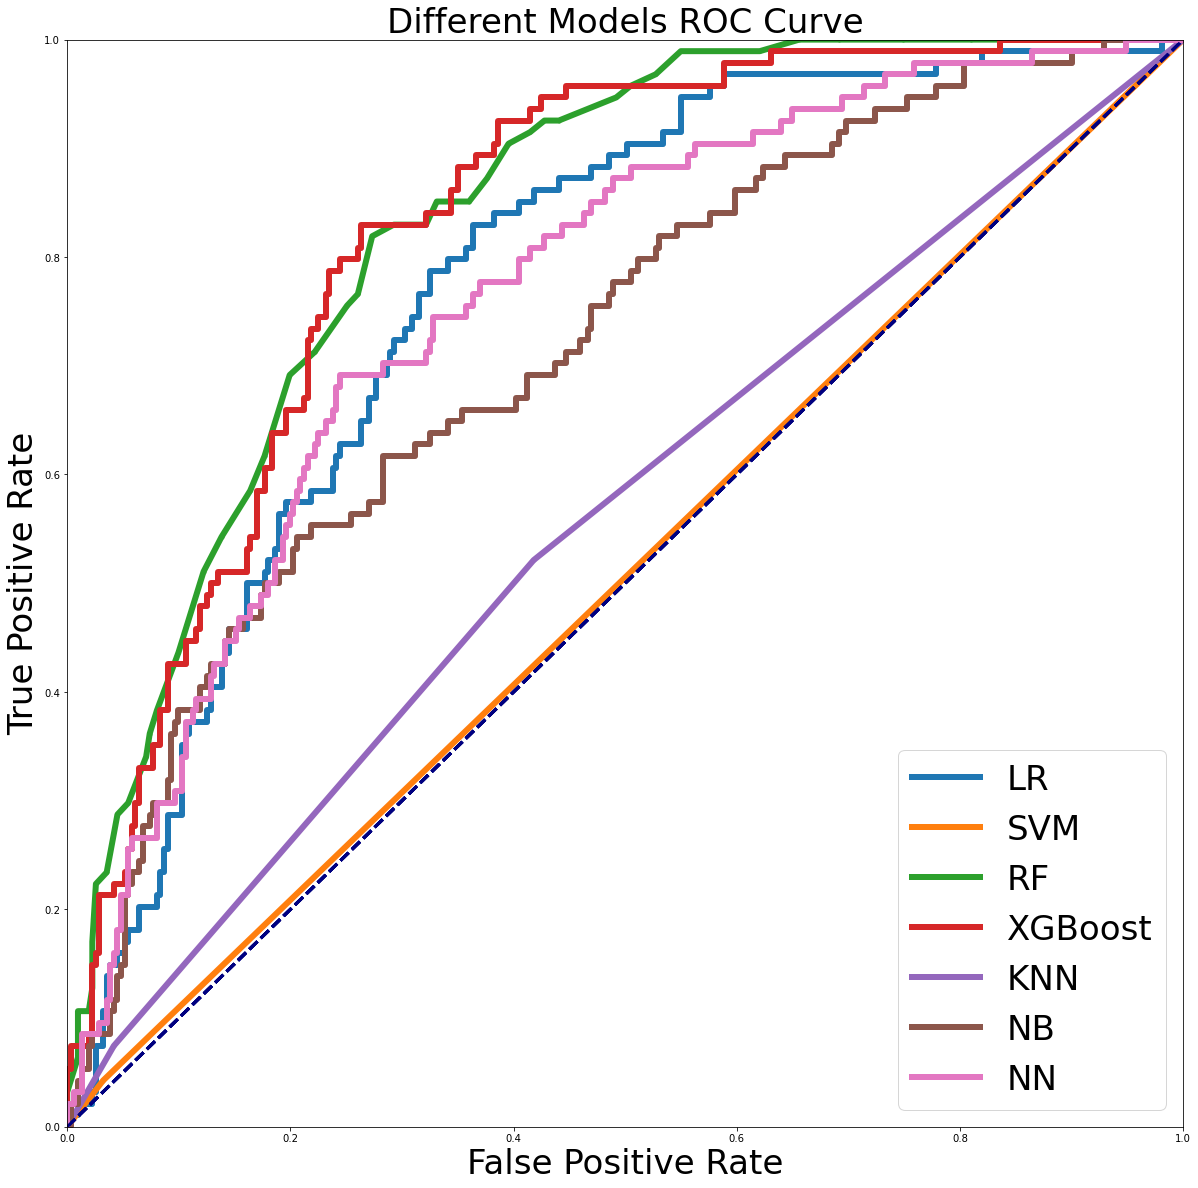

,Name,Accuracy,Precision,Sensitivity,Specificity,F1,ROC
0,LR,0.767901,0.500000,0.351064,0.893891,0.412500,0.774099
0,SVM,0.753086,0.285714,0.042553,0.967846,0.074074,0.505199
0,RF,0.777778,0.625000,0.106383,0.980707,0.181818,0.835517
0,XGBoost,0.787654,0.554054,0.436170,0.893891,0.488095,0.829719
0,KNN,0.753086,0.350000,0.074468,0.958199,0.122807,0.556304
0,NB,0.750617,0.463158,0.468085,0.836013,0.465608,0.717623
0,NN,0.762963,0.487179,0.404255,0.871383,0.441860,0.762913


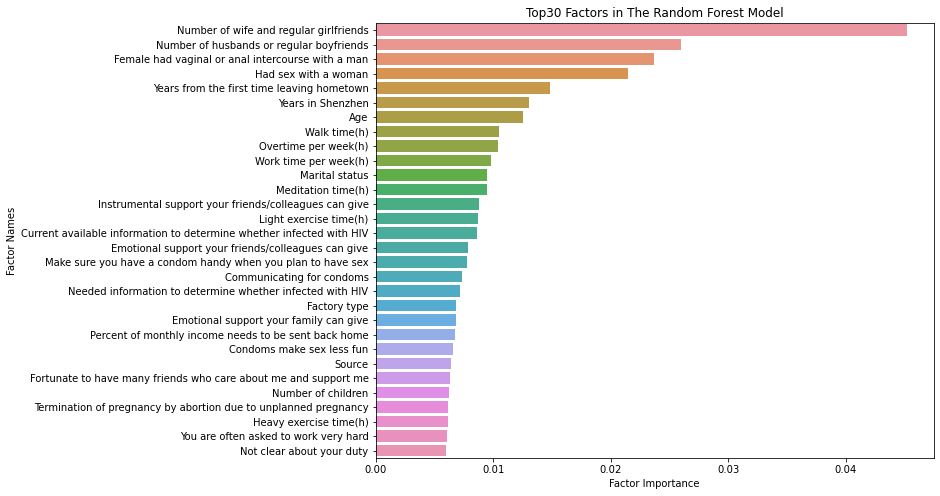

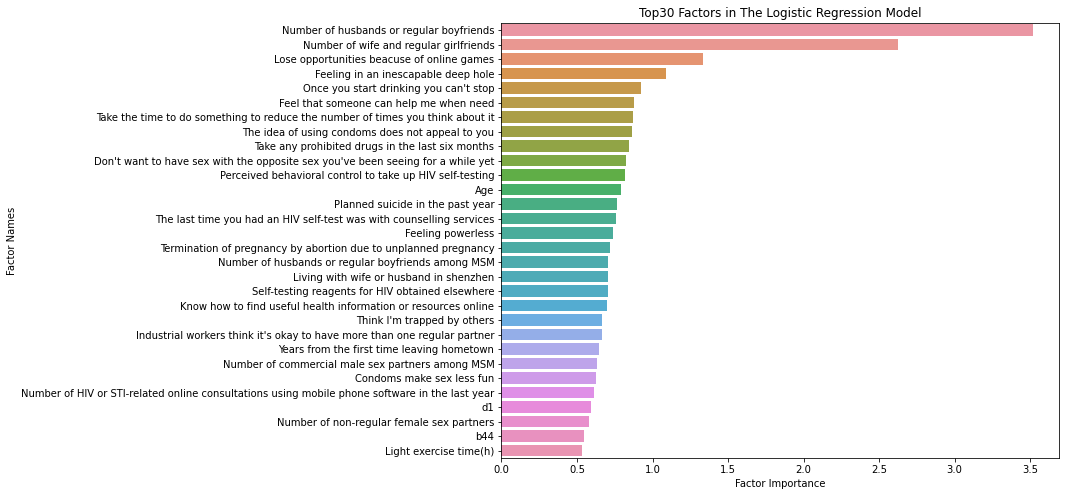

[23:56:03] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


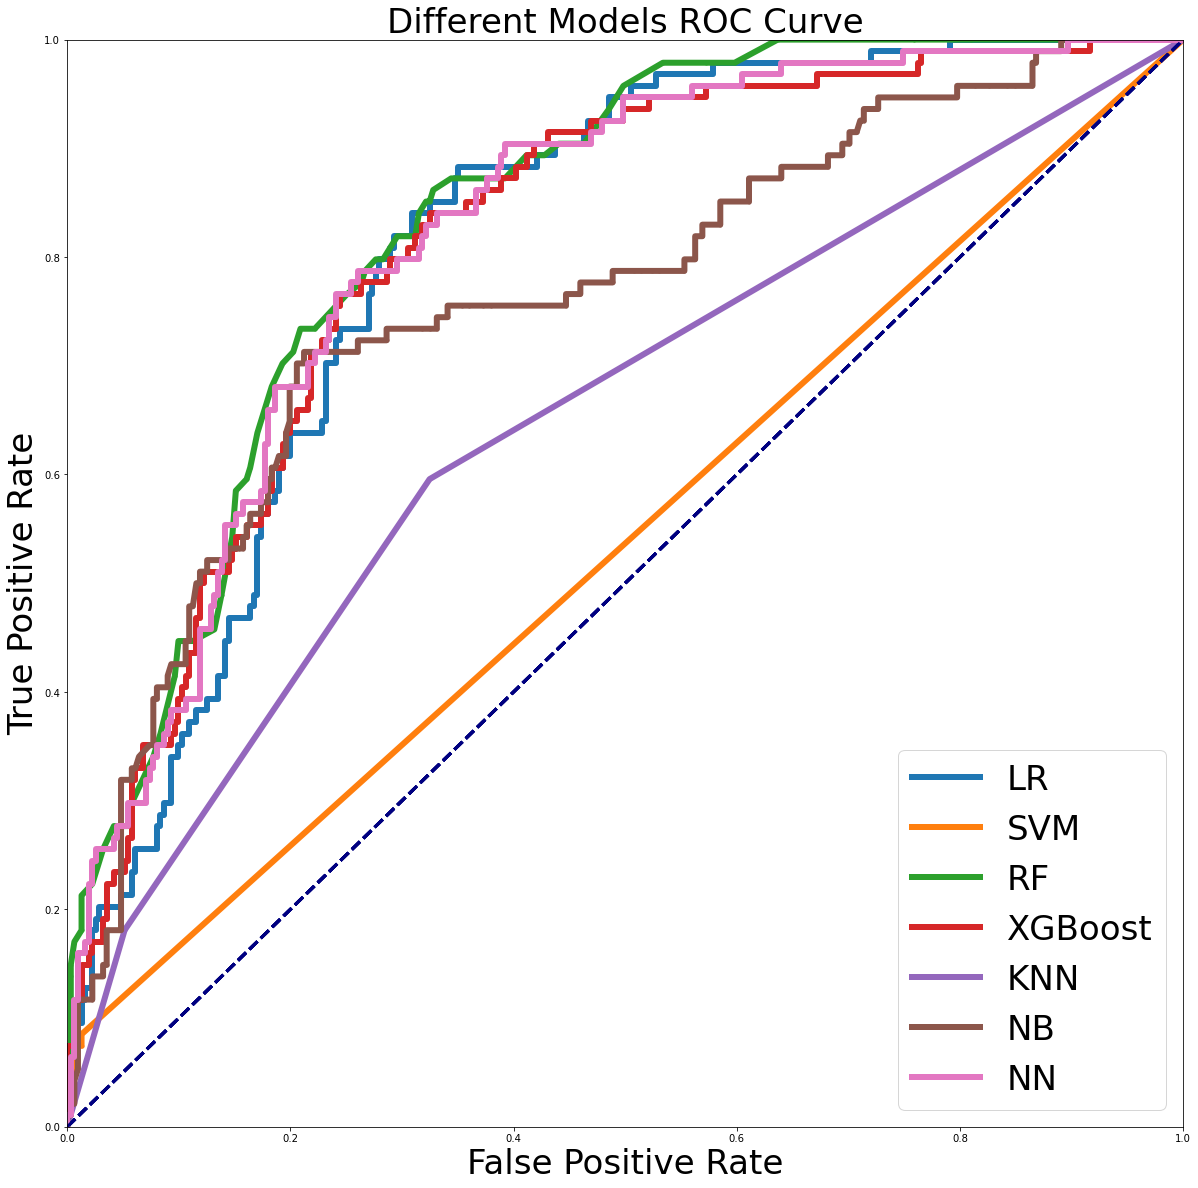

,Name,Accuracy,Precision,Sensitivity,Specificity,F1,ROC
0,LR,0.767901,0.500000,0.255319,0.922830,0.338028,0.810392
0,SVM,0.777778,0.700000,0.074468,0.990354,0.134615,0.536293
0,RF,0.787654,0.571429,0.340426,0.922830,0.426667,0.835089
0,XGBoost,0.780247,0.532468,0.436170,0.884244,0.479532,0.814463
0,KNN,0.770370,0.515152,0.180851,0.948553,0.267717,0.649535
0,NB,0.797531,0.615385,0.340426,0.935691,0.438356,0.761528
0,NN,0.770370,0.506667,0.404255,0.881029,0.449704,0.820654


[23:56:07] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


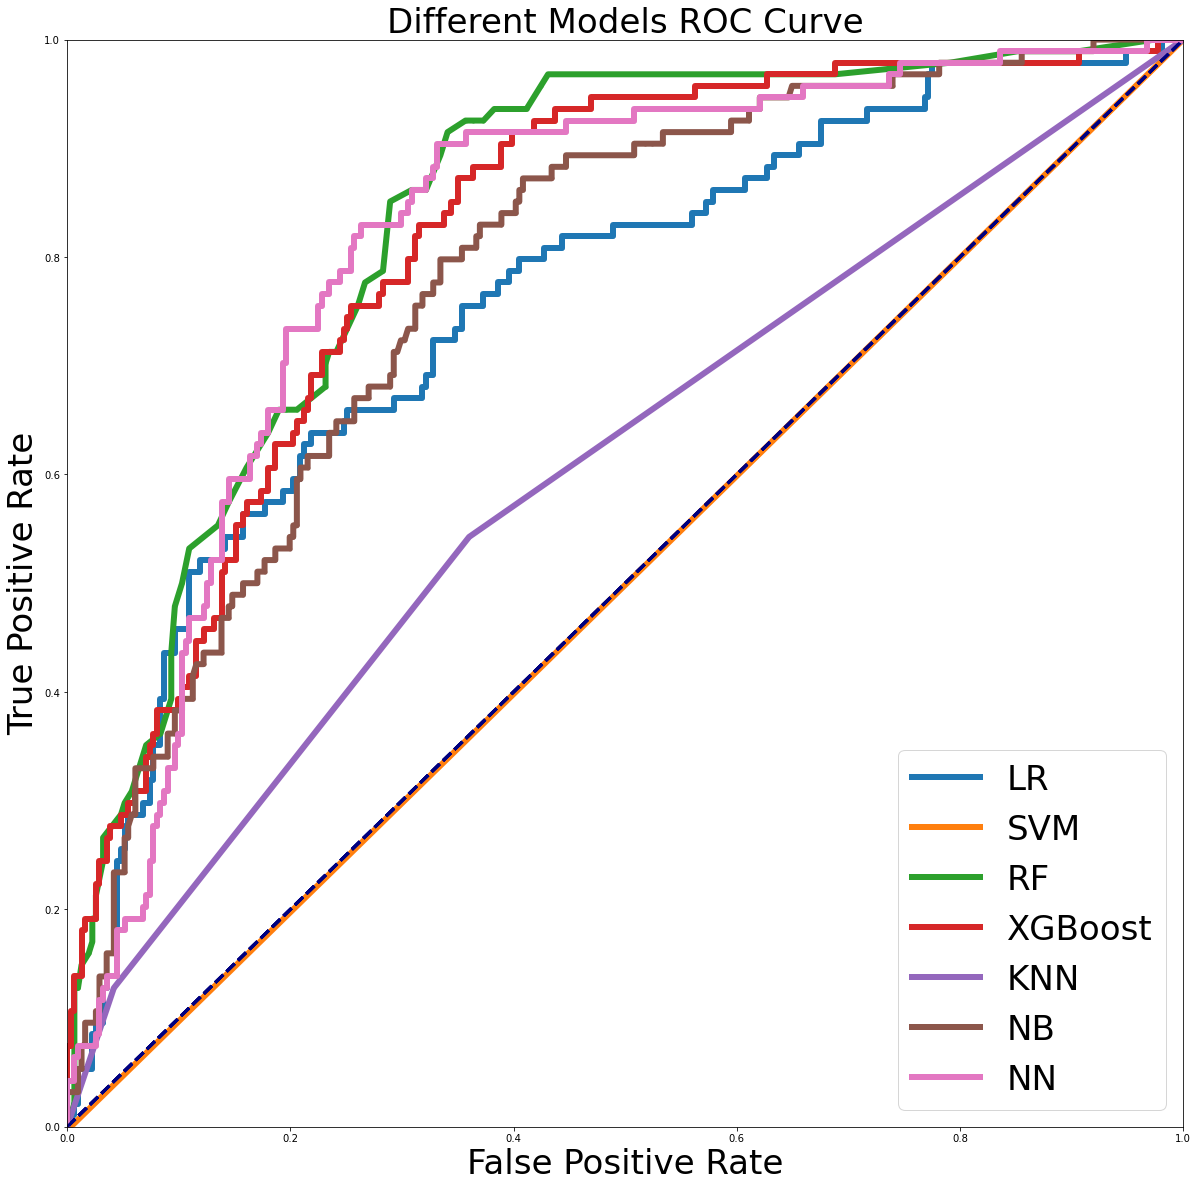

,Name,Accuracy,Precision,Sensitivity,Specificity,F1,ROC
0,LR,0.790123,0.600000,0.287234,0.942122,0.388489,0.759287
0,SVM,0.765432,0.000000,0.000000,0.996785,0.000000,0.498392
0,RF,0.795062,0.617021,0.308511,0.942122,0.411348,0.836167
0,XGBoost,0.782716,0.538462,0.446809,0.884244,0.488372,0.817404
0,KNN,0.765432,0.480000,0.127660,0.958199,0.201681,0.602860
0,NB,0.785185,0.594595,0.234043,0.951768,0.335878,0.782736
0,NN,0.780247,0.536232,0.393617,0.897106,0.453988,0.818225


In [111]:
'''Here is a loop to find best number of variables.Because I find it and plot figures,I note it for no-run, you can delete it for show
for stand in range(0,268,1):
'''
stand=30
#print(color.BOLD_COLOR +str(stand)+color.END)
rf1,lr1=features(1,stand,x_train,y_train,x_test,y_test)

#rename top 20 variables for the figure show
feature_plot(rf1.iloc[:,1],rf1.iloc[:,0],stand,'Random Forest')
feature_plot(lr1.iloc[:,1],lr1.iloc[:,0],stand,'Logistic Regression')

rf2,lr2=features(2,stand,x_train[rf1.iloc[:,0]],y_train,x_test[rf1.iloc[:,0]],y_test)


rf3,lr3=features(2,stand,x_train[lr1.iloc[:,0]],y_train,x_test[lr1.iloc[:,0]],y_test)
